# HW 2 Set 1 - Problem 2 (SVM Problem in $R^2$)

Use the dataset titled ”DataSetR2.txt”, which consists of a finite set of points in $\mathbb{R}^2$, each labeled as −1 or 1. Employ the subgradient method to determine a hyperplane that maximizes the margin between the points labeled −1 and those labeled 1. Provide your solution in the form $⟨w, x⟩ + b = 0,$ where $w \in \mathbb{R}^2$ and $b \in \mathbb{R}$. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Hyperplane equation: ⟨ [-21.83788642  26.5368851 ] , x⟩ + -0.3400000000000002 = 0


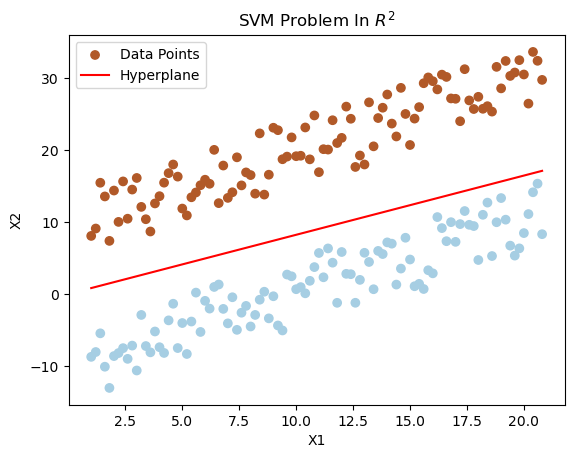

In [18]:
# Load dataset
data = np.loadtxt("DataSetR2.txt")

# Separate features and labels
X = data[:, :-1]  # features are all columns except the last
y = data[:, -1]  # label is in the last column

num_data = X.shape[0]  # number of data points
n = 2  # number of features

# Subgradient method
def subgradient_method(X, y, n, num_data, tol, maxiter, alpha, C):
    # Initialize w and b for defining the hyperplane
    iteration = 0
    w = np.ones(n)
    b = 1
    sgw = np.ones(n)
    sgb = 1

    def subgradient(w, b, X, y, n, num_data):
        sgw = np.zeros(n)
        sgb = 0

        for i in range(num_data):
            margin = y[i] * (np.dot(X[i], w) + b)  # Compute margin

            if margin < 1:  # Compare margin with 1
                sgw += (-1) * y[i] * X[i]
                sgb += (-1) * y[i]

        return sgw, sgb

    while iteration < maxiter:
        if np.linalg.norm(sgw) < tol and np.linalg.norm(sgb) < tol:
            break
        else:
            sgw, sgb = subgradient(w, b, X, y, n, num_data)
            w -= alpha * (w + (C / num_data) * sgw)
            b -= alpha * (C / num_data) * sgb
            iteration += 1

        if iteration == maxiter:
            print("Maximum number of iterations reached.")
    return w, b

# Run subgradient method
w, b = subgradient_method(X, y, n, num_data, tol=1e-8, maxiter=1000, alpha=0.01, C=400)

# Print the hyperplane equation
print("Hyperplane equation: ⟨", w, ",", "x⟩ +", b, "= 0")

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label="Data Points")

# Plot the hyperplane
x_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_plot = (-w[0] * x_plot - b) / w[1]
plt.plot(x_plot, y_plot, '-r', label="Hyperplane")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM Problem In $R^2$")
plt.legend()
plt.show()

# HW 2 Set 1 - Problem 3 (SVM Problem on Subset of Iris Dataset)

Use the dataset titled “irissetonaandversicolor.txt” on Canvas, which includes data on two types of iris flowers labeled as −1 or 1. Allocate 80\% of the dataset for training and reserve the remaining 20\% for testing. Solve the support vector machine (SVM) problem using either the subgradient method or the stochastic subgradient method based on the training data. Then, evaluate the accuracy of your SVM model using the test data.

In [8]:
# Load dataset
data = np.loadtxt("irissetonaandversicolor.txt")

# Separate features and labels
X = data[:, 1:]  # features are all columns except the last
y = data[:, 0]  # label is in the last column

num_data = X.shape[0]  # number of data points
n = 4  # number of features

# Define train-test split ratio
train_ratio = 0.80
test_ratio = 0.20

# Calculate number of samples for training and testing
num_samples = X.shape[0]
num_train_samples = int(train_ratio * num_samples)
num_test_samples = num_samples - num_train_samples

# Shuffle the dataset and split into training and testing sets
indices = np.random.permutation(num_samples)
train_indices = indices[:num_train_samples]
test_indices = indices[num_train_samples:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

num_data_train = X_train.shape[0]  # number of data points in training set

# Subgradient method
def subgradient_method(X, y, n, num_data, tol, maxiter, alpha, C):
    # Initialize w and b for defining the hyperplane
    iteration = 0
    w = np.ones(n)
    b = 1
    sgw = np.ones(n)
    sgb = 1

    def subgradient(w, b, X, y, n, num_data_train):
        sgw = np.zeros(n)
        sgb = 0

        for i in range(num_data_train):
            margin = y[i] * (np.dot(X[i], w) + b)  # Compute margin

            if margin < 1:  # Compare margin with 1
                sgw += (-1) * y[i] * X[i]
                sgb += (-1) * y[i]

        return sgw, sgb

    while iteration < maxiter:
        if np.linalg.norm(sgw) < tol and np.linalg.norm(sgb) < tol:
            break
        else:
            sgw, sgb = subgradient(w, b, X, y, n, num_data_train)
            w -= alpha * (w + (C / num_data_train) * sgw)
            b -= alpha * (C / num_data_train) * sgb
            iteration += 1

        if iteration == maxiter:
            print("Maximum number of iterations reached.")
    return w, b

# Run subgradient method on training data
w, b = subgradient_method(X_train, y_train, n, num_data_train, tol=1e-8, maxiter=1000, alpha=0.01, C=400)

# Compute predictions
predictions = np.sign(np.dot(X_test, w) + b)

# Compute accuracy
correct_predictions = np.sum(predictions == y_test)
accuracy = correct_predictions / len(y_test)
print("Accuracy:", accuracy * 100, "%")

# Print the hyperplane equation
print("Hyperplane equation: ⟨", w, ",", "x⟩ +", b, "= 0")

Accuracy: 100.0 %
Hyperplane equation: ⟨ [  2.3823397    8.4931235  -11.06496299  -3.96913654] , x⟩ + 2.1499999999999995 = 0


# HW 2 Set 1 - Problem 4 (SVM Problem on Email Spam Dataset)

Use the stochastic subgradient method on the “spam dataset” to solve the support vector machine problem. The program uses the training data to find the separating hyperplane. Then it uses the test data to show the accuracy of the method.

In [62]:
# Load dataset
df1 = pd.read_excel('spam_train.xls')
data_x_train = df1.values
df2 = pd.read_excel('spam_test.xls')
data_x_test = df2.values
df3 = pd.read_excel('spam_train_y.xls')
data_y_train = df3.values
data_y_train = data_y_train.flatten()  
df4 = pd.read_excel('spam_test_y.xls')
data_y_test = df4.values
data_y_test = data_y_test.flatten()  

num_data = data_x_train.shape[0]  # number of data points
n = data_x_train.shape[1]  # number of features

# Subgradient method
def subgradient_method(X, y, n, num_data, tol, maxiter, alpha, C):
    # Initialize w and b for defining the hyperplane
    iteration = 0
    w = np.ones(n)
    b = 1
    sgw = np.ones(n)
    sgb = 1

    def subgradient(w, b, X, y, n, num_data):
        sgw = np.zeros(n)
        sgb = 0

        for i in range(num_data):
            margin = y[i] * (np.dot(X[i], w) + b)  # Compute margin

            if margin < 1:  # Compare margin with 1
                sgw += (-1) * y[i] * X[i]
                sgb += (-1) * y[i]

        return sgw, sgb

    while iteration < maxiter:
        if np.linalg.norm(sgw) < tol and np.linalg.norm(sgb) < tol:
            break
        else:
            sgw, sgb = subgradient(w, b, X, y, n, num_data)
            w -= alpha * (w + (C / num_data) * sgw)
            b -= alpha * (C / num_data) * sgb
            iteration += 1

        if iteration == maxiter:
            print("Maximum number of iterations reached.")
    return w, b

# Run subgradient method on training data
w, b = subgradient_method(data_x_train, data_y_train, n, num_data, tol=1e-6, maxiter=10000, alpha=0.01, C=400)

# Compute predictions
predictions = np.sign(np.dot(data_x_test, w) + b)

# Compute accuracy
correct_predictions = np.sum(predictions == data_y_test)
accuracy = correct_predictions / len(data_y_test)
print("Accuracy:", accuracy * 100, "%")

# Print the hyperplane equation
#print("Hyperplane equation: ⟨", w, ",", "x⟩ +", b, "= 0")

Maximum number of iterations reached.
Accuracy: 91.04761904761904 %
